In [1]:
import drjit as dr
import numpy as np
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb")
import matplotlib.pyplot as plt
from PDE2D.Coefficient import *
from PDE2D.utils import *
from PDE2D.BoundaryShape import *
from PDE2D.Solver import *
import matplotlib.patches as patches
from PDE2D.utils.helpers import *

In [2]:
origin_object1 =Point2f(0.2, 0.0)
radius_object1 = 0.2
origin_object2 =Point2f(0.0, -0.4)
radius_object2 = 0.1
epsilon = 1e-5
dirichlet = [ConstantCoefficient("dirichlet", 1)]
neumann = [ConstantCoefficient("neumann", 2)]
in_dirichlet = [ConstantCoefficient("dirichlet", 0)]

angle_partition = np.array([0, np.pi/2, 3 * np.pi/4, np.pi, 3 * np.pi /2])
dirichlet_map = np.array([False, False, False, False, False])
rad = 1.2
scale = 1.2
bbox = [[-scale * rad, -scale * rad], [scale * rad, scale * rad]]

out_shape = CircleShape(origin=Point2f(0.,0.), radius = rad, name = "in-boundary", epsilon = 0.01,
                        dirichlet=dirichlet, neumann = neumann, angle_partition = angle_partition, dirichlet_map = dirichlet_map)
in_shape1 = CircleShape(origin =Point2f(origin_object1), radius = radius_object1, name = "in-boundary1", 
                       dirichlet=in_dirichlet, epsilon=epsilon)
in_shape2 = CircleShape(origin =Point2f(origin_object2), radius = radius_object2, name = "in-boundary1", 
                       dirichlet=in_dirichlet, epsilon=epsilon)
in_boundaries = [in_shape1, in_shape2]
shape = BoundaryWithDirichlets(out_boundary=out_shape, dirichlet_boundaries=in_boundaries)

In [3]:
r = 1.2;
num_points = 6
theta = np.linspace(0,2*np.pi * (num_points-1)/ num_points,num_points) + np.pi/10
x = r * np.cos(theta)
y = r * np.sin(theta)
points =Point2f(x, y)
indices = np.arange(num_points)
bi = shape.boundary_interaction(points);

In [4]:
bi.is_star

[True, True, True, True, True, True]

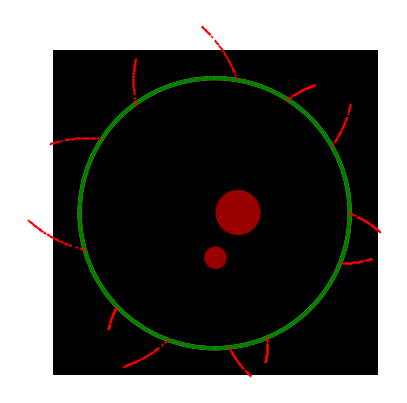

In [5]:
fig, (ax) = plt.subplots(1, 1, figsize=[5, 5])
resolution = [1024, 1024]
shape.sketch_image(ax, bbox, resolution)
#bi.sketch_stars(ax, indices, bbox, resolution);
sampler = PCG32()
for i in range(200):
    direction,  pdf = bi.sample_neumann(sampler.next_float32(), on_boundary=bi.on_boundary)
    sphere_points = (direction * bi.r + bi.origin)
    sphere_points = point2sketch(sphere_points, bbox, resolution).numpy()
    ax.scatter(sphere_points[0,:], sphere_points[1,:], color = "red", s=0.5)


[0.31831, 0.31831, 0.31831, 0.31831, 0.31831, 0.31831]


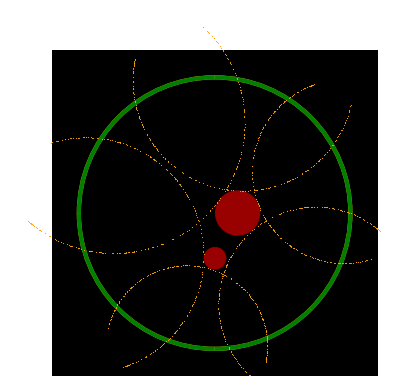

In [6]:
fig, (ax) = plt.subplots(1, 1, figsize=[5, 5])
shape.sketch_image(ax, bbox, resolution)
#bi.sketch_stars(ax, indices, bbox, resolution);

for i in range(200):
    direction, sphere_points, pdf = bi.sample_recursive(sampler.next_float32())
    sphere_points = (direction * bi.r + bi.origin)
    sphere_points = point2sketch(sphere_points, bbox, resolution).numpy()
    ax.scatter(sphere_points[0,:], sphere_points[1,:], color = "orange", s=0.1)
print(pdf)